<a href="https://colab.research.google.com/github/FreshJonas/NLP-on-Movie-Plots/blob/master/vio_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hollywood Movies vs. Bollywood Movies

What are these movies about? Are Bollywood movies about different things from Hollywood movies? In this Notebook I use LDA algorithm together with gensim library to find out. 

# Import Libraries

In [ ]:
path_to_Bollywood = '/content/drive/MyDrive/Colab Notebooks/CVNLP/indian_plots.csv'
path_to_Hollywood = '/content/drive/MyDrive/Colab Notebooks/CVNLP/american_plots.csv'

In [ ]:
import pandas as pd
import re
import string
import spacy

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Create a common Dictionary & LDA Model

## Merge both datasets

In [ ]:
#upload Dataset
bolly_df = pd.read_csv(path_to_Bollywood)
bolly_df.head()

,Unnamed: 0,title,plot
0,0,4 the People,"Aravind (Arun), Vivek (Bharath), Eshwar (Arjun..."
1,1,Aa Gaya Hero,ACP Ravindra Varma (Govinda) is a daredevil an...
2,2,Aadmi (1993 film),Aadmi is the story of an honest man (Vijay M. ...
3,3,Aadu Puli Attam (1977 film),"The movie starts with Kamal and Rajini, close ..."
4,4,Aag Aandhi Aur Toofan,The story revolves around attempts by several ...


In [ ]:
holly_df = pd.read_csv(path_to_Hollywood)
holly_df.head()

,Unnamed: 0,title,plot
0,0,10.0 Earthquake,As a series of minor earthquakes start tearing...
1,1,12 Rounds (film),A sting operation to capture arms dealer Miles...
2,2,12 Rounds 3: Lockdown,Detective Tyler Burke and his two men infiltr...
3,3,200 mph,When the older brother (Tommy Nash) he idolize...
4,4,Ablaze (2001 film),Andrew Thomas is an agent tasked with recordin...


In [ ]:
# Add country
bolly_df['country'] = 'India'
bolly_df.head()

,Unnamed: 0,title,plot,country
0,0,4 the People,"Aravind (Arun), Vivek (Bharath), Eshwar (Arjun...",India
1,1,Aa Gaya Hero,ACP Ravindra Varma (Govinda) is a daredevil an...,India
2,2,Aadmi (1993 film),Aadmi is the story of an honest man (Vijay M. ...,India
3,3,Aadu Puli Attam (1977 film),"The movie starts with Kamal and Rajini, close ...",India
4,4,Aag Aandhi Aur Toofan,The story revolves around attempts by several ...,India


In [ ]:
holly_df['country'] = 'America'
holly_df.head()

,Unnamed: 0,title,plot,country
0,0,10.0 Earthquake,As a series of minor earthquakes start tearing...,America
1,1,12 Rounds (film),A sting operation to capture arms dealer Miles...,America
2,2,12 Rounds 3: Lockdown,Detective Tyler Burke and his two men infiltr...,America
3,3,200 mph,When the older brother (Tommy Nash) he idolize...,America
4,4,Ablaze (2001 film),Andrew Thomas is an agent tasked with recordin...,America


In [ ]:
df = holly_df.append(bolly_df)
print(f"Shape is {df.shape}")
display(df)

Shape is (4000, 4)


,Unnamed: 0,title,plot,country
0,0,10.0 Earthquake,As a series of minor earthquakes start tearing...,America
1,1,12 Rounds (film),A sting operation to capture arms dealer Miles...,America
2,2,12 Rounds 3: Lockdown,Detective Tyler Burke and his two men infiltr...,America
3,3,200 mph,When the older brother (Tommy Nash) he idolize...,America
4,4,Ablaze (2001 film),Andrew Thomas is an agent tasked with recordin...,America
...,...,...,...,...
1995,1995,Choked (film),Sarita Pillai and Sushant Pillai are a married...,India
1996,1996,Chumbak,"Chumbak is a coming-of-age story of Baalu, a t...",India
1997,1997,Chungakkarum Veshyakalum,Chungakkarum Veshyakalum is the story of a Mal...,India
1998,1998,Chuzhi,Varghese is a planter who lives with his wife ...,India


## Pre-processing Data

In [ ]:
# Convert uppercase to lowercase
corpus = [document.lower() for document in df['plot']]

# Remove end of line
# corpus = [(re.sub(r'\n', '' , document)) for document in corpus]

# Remove digits
corpus = [(re.sub(r'\d', '' , document)) for document in corpus]

# Remove punctuation marks
pattern = r'[' + re.escape(string.punctuation) + ']'
corpus = [(re.sub(pattern, '' , document)) for document in corpus]

# Remove superflous blanks
corpus = [(re.sub(r' +', ' ', document)) for document in corpus]

In [ ]:
print(corpus[0])

as a series of minor earthquakes start tearing apart los angeles scientist emily of the usgs theorizes that it is all building to a super quake that will drop the entire city into a lavafilled chasm engineer jack whose daughter has gone camping with her friends in the danger area and whose company is responsible for the quakes due to their deep fracking feels obligated to help and races with emily through the increasingly damaged city with the hopes of diverting the epicenter to long beach and potentially saving millions of lives in the city of los angeles


In [ ]:
# Tokenize
tokens = [nltk.word_tokenize(document) for document in corpus]

In [ ]:
#loading the english language of spacy and stopwords.
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words

# Delete stopwords
tokenized_corpus = []
for document in tokens:
    tokenized_corpus.append([token for token in document if token not in sw_spacy])

In [ ]:
# Lemmatize
lemmatizer = WordNetLemmatizer()
lemmatized_corpus = []
for document in tokenized_corpus:
    lemmatized_corpus.append([lemmatizer.lemmatize(token) for token in document])

In [ ]:
print(df.shape)
print(len(lemmatized_corpus))

(4000, 4)
4000


In [ ]:
lemmatized_corpus[0]

In [ ]:
# Add tokens to the df
df['tokenized_text'] = lemmatized_corpus

In [ ]:
display(df)

,Unnamed: 0,title,plot,country,tokenized_text
0,0,10.0 Earthquake,As a series of minor earthquakes start tearing...,America,"[series, minor, earthquake, start, tearing, ap..."
1,1,12 Rounds (film),A sting operation to capture arms dealer Miles...,America,"[sting, operation, capture, arm, dealer, mile,..."
2,2,12 Rounds 3: Lockdown,Detective Tyler Burke and his two men infiltr...,America,"[detective, tyler, burke, men, infiltrate, hou..."
3,3,200 mph,When the older brother (Tommy Nash) he idolize...,America,"[older, brother, tommy, nash, idolizes, run, r..."
4,4,Ablaze (2001 film),Andrew Thomas is an agent tasked with recordin...,America,"[andrew, thomas, agent, tasked, recording, vio..."
...,...,...,...,...,...
1995,1995,Choked (film),Sarita Pillai and Sushant Pillai are a married...,India,"[sarita, pillai, sushant, pillai, married, cou..."
1996,1996,Chumbak,"Chumbak is a coming-of-age story of Baalu, a t...",India,"[chumbak, comingofage, story, baalu, teen, res..."
1997,1997,Chungakkarum Veshyakalum,Chungakkarum Veshyakalum is the story of a Mal...,India,"[chungakkarum, veshyakalum, story, malayali, f..."
1998,1998,Chuzhi,Varghese is a planter who lives with his wife ...,India,"[varghese, planter, life, wife, elizabeth, dau..."


## Create a common Dictionary

In [ ]:
# Create dictionary:
dictionary = corpora.Dictionary(lemmatized_corpus)

## Create Bag of Words

In [ ]:
bag_of_words = []
for document in lemmatized_corpus:
    bow = dictionary.doc2bow(document)
    bag_of_words.append(bow)

In [ ]:
print(bag_of_words[0])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1)]


## Create LDA Model

In [ ]:
####### CAREFUL!!!! THIS MIGHT TAKES LONG ##################################
lda_model = gensim.models.ldamodel.LdaModel(corpus=bag_of_words,
                                            id2word=dictionary,
                                            num_topics=10,
                                            random_state=42, 
                                            passes=10)

## Optimize Model

In [ ]:
# Topic range
start = 1
stop = 10
step = 1
topics_range = range(start, stop, step)

model_results = {'Topic_Number': [],
                 'Coherence_Value': []
                }

In [ ]:
model_list = []

for num_topics in topics_range: 
  lda_model = gensim.models.ldamodel.LdaModel(corpus=bag_of_words, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)
  model_list.append(lda_model)

  coherence_model = gensim.models.coherencemodel.CoherenceModel(model=lda_model, texts=lemmatized_corpus, dictionary=dictionary, coherence='c_v')  

  model_results['Topic_Number'].append(num_topics)
  coherence_val = coherence_model.get_coherence()
  model_results['Coherence_Value'].append(coherence_val)

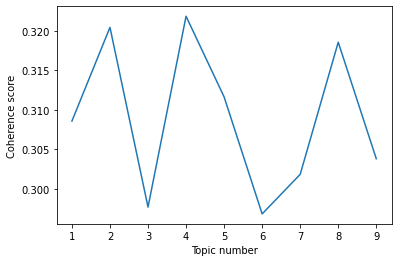

In [ ]:
# Show graphic: 
import matplotlib.pyplot as plt
x = model_results['Topic_Number']
plt.plot(x, model_results['Coherence_Value'])
plt.xlabel("Topic number")
plt.ylabel("Coherence score")
plt.show()

In [ ]:
import pandas as pd
model_results = pd.DataFrame(model_results)
display(model_results)

,Topic_Number,Coherence_Value
0,1,0.308559
1,2,0.320424
2,3,0.297668
3,4,0.321832
4,5,0.311619
5,6,0.296803
6,7,0.301811
7,8,0.318545
8,9,0.303789


In [ ]:
# Get best hyperparameters
best_num_topics = 0
best_coherence = 0
for idx, cv in enumerate(model_results['Coherence_Value']):
  if cv > best_coherence: 
    
    best_coherence = cv
    best_num_topics = model_results['Topic_Number'].loc[idx]
    print(f"Num topics = {model_results['Topic_Number'].iloc[idx]}, has coherence value of {round(cv, 2)}")

Num topics = 1, has coherence value of 0.31
Num topics = 2, has coherence value of 0.32
Num topics = 4, has coherence value of 0.32


In [ ]:
print(f"Best number of topics is {best_num_topics}")

Best number of topics is 4


# Try LDA for Bollywood movies

In [ ]:
bolly_corpus = df['tokenized_text'].loc[df['country'] == 'India']
bag_of_words_india = []
for document in bolly_corpus:
    bow = dictionary.doc2bow(document)
    bag_of_words_india.append(bow)

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bag_of_words_india, dictionary, mds='mmds', R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.067394  0.018224       1        1  29.981886
2      0.021348  0.070725       2        1  24.572972
1      0.068527 -0.026408       3        1  23.956434
3     -0.022480 -0.062541       4        1  21.488707, topic_info=          Term        Freq        Total Category  logprob  loglift
16382     raja  576.000000   576.000000  Default  30.0000  30.0000
31452    surya  304.000000   304.000000  Default  29.0000  29.0000
1462   charlie  105.000000   105.000000  Default  28.0000  28.0000
31328    munna  106.000000   106.000000  Default  27.0000  27.0000
5967       ram  347.000000   347.000000  Default  26.0000  26.0000
...        ...         ...          ...      ...      ...      ...
170       kill  179.957876  1079.473896   Topic4  -5.9617  -0.2539
514       take  144.615342   639.662687   Topic4  -6.1803   0.0508
1132     child  148.892761   730.873160   Topic4  -6.1511  -0.0534
194      money  149.107217   773.735257   Topic4  -6.1497  -0.1089
137        get  152.601042   938.053255   Topic4  -6.1265  -0.2783

[365 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
31107      1  0.103902  aadhi
31107      2  0.872774  aadhi
21498      3  0.951733   abel
45059      3  0.967907    aby
40701      4  0.940433   achu
...      ...       ...    ...
1212       1  0.331170   wife
1212       2  0.248964   wife
1212       3  0.177328   wife
1212       4  0.241918   wife
38227      4  0.958476   yuvi

[612 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

# Try LDA for Hollywood movies

In [ ]:
holly_corpus = df['tokenized_text'].loc[df['country'] == 'America']
bag_of_words_america = []
for document in holly_corpus:
    bow = dictionary.doc2bow(document)
    bag_of_words_america.append(bow)

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bag_of_words_america, dictionary, mds='mmds', R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.069179  0.017013       1        1  28.488302
2      0.021852  0.070388       2        1  27.941684
1      0.068737 -0.026694       3        1  23.985901
0     -0.021411 -0.060707       4        1  19.584113, topic_info=          Term        Freq        Total Category  logprob  loglift
16382     raja  599.000000   599.000000  Default  30.0000  30.0000
31400     ravi  502.000000   502.000000  Default  29.0000  29.0000
30976    vijay  587.000000   587.000000  Default  28.0000  28.0000
1462   charlie  144.000000   144.000000  Default  27.0000  27.0000
31452    surya  457.000000   457.000000  Default  26.0000  26.0000
...        ...         ...          ...      ...      ...      ...
121       fall  205.262472   909.331503   Topic4  -6.0413   0.1420
83        come  234.585264  1307.966679   Topic4  -5.9077  -0.0880
1609      film  227.368166  1219.838867   Topic4  -5.9390  -0.0495
650     mother  215.713268  1160.821764   Topic4  -5.9916  -0.0525
172      later  212.425119  1105.666137   Topic4  -6.0070  -0.0192

[364 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
31107      2  0.919641  aadhi
31107      4  0.070742  aadhi
21498      2  0.036867   abel
21498      3  0.958553   abel
45059      3  0.983949    aby
...      ...       ...    ...
38227      1  0.979846   yuvi
3023       1  0.146898      ’
3023       2  0.459390      ’
3023       3  0.141556      ’
3023       4  0.253733      ’

[642 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1])